In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import os

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.regularizers import l1
from keras.regularizers import l2
from keras.layers import Dropout

Using TensorFlow backend.


## Train Choosen Model with More Epochs

Before to evaluate distinct arquitectures to the model, i will work with the model 2 because before to evaluate distinct parameters I get that the model 2 make the better accuracy.  The architecture choosen was the follow:

![img](./ModelFinal.JPG)

I choose train the samel model with more epochs until to see unchanges in the loss.

In [36]:
df_x = pd.read_csv('./data/xtrain.txt', delim_whitespace=True, header= None)
df_x_test = pd.read_csv('./data/xtest.txt', delim_whitespace=True, header= None)
df_y = pd.read_csv('./data/ytrain.txt', delim_whitespace=True, header= None)

df_y.columns = ['Label']
df_y.Label = df_y.Label.astype(np.int8)
df_y.head()

# Eliminate outliers
df_x_temp = df_x[(np.abs(stats.zscore(df_x)) < 3).all(axis=1)]
df_y_temp = df_y[(np.abs(stats.zscore(df_x)) < 3).all(axis=1)]


# standarization raw data
df_x_stand_out = StandardScaler().fit_transform(df_x)

# standarization without outliers
df_x_stand = StandardScaler().fit_transform(df_x_temp)
df_x_test_stand = StandardScaler().fit_transform(df_x_test)


#split data in training and validation set without outliyers
X_train, X_valid, y_train, y_valid = train_test_split(df_x_stand, df_y_temp, test_size=0.4, random_state=42)
# reducing dimensionality
pcaFinal=PCA(n_components=26) # use 26 dimensions
pcaFinal.fit(X_train) # obtener los componentes principales
X_pca_train_final=pcaFinal.transform(X_train) # convertimos nuestros datos con las nuevas dimensiones de PCA
# X validation
X_pca_valid_final=pcaFinal.transform(X_valid)

#split data in training and validation set with outliyers, I don´t aplly pca to data because this method is very sensible to outliers
X_train_raw, X_valid_raw, y_train_raw, y_valid_raw = train_test_split(df_x_stand_out, df_y, test_size=0.4, random_state=42)

print('Training data raw shape', X_train_raw.shape)
print('Training data without outliyers and PCA shape', X_pca_train_final.shape)

Training data raw shape (6600, 30)
Training data without outliyers and PCA shape (5728, 26)


In [48]:
#create model with ouliyers
modelFinal1 = Sequential()
modelFinal1.add(Dense(20, input_dim=30, activation='elu',kernel_regularizer=l2(l=0.005)))
modelFinal1.add(Dense(20, activation='elu',kernel_regularizer=l2(l=0.005)))
modelFinal1.add(Dense(20, activation='elu',kernel_regularizer=l2(l=0.005)))
modelFinal1.add(Dense(1, activation='sigmoid'))
# Compile model
sgd = SGD(lr=0.001, momentum=0.9)
modelFinal1.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
scoresFinal1 =modelFinal1.fit(X_train_raw, y_train_raw,validation_data=(X_valid_raw,y_valid_raw), 
                            epochs=2000, batch_size=128, verbose = 0)



In [49]:
print(modelFinal1.summary())

print('The final validation accuracy was ', scoresFinal1.history['val_accuracy'][-1] * 100)


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_46 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_47 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 21        
Total params: 1,481
Trainable params: 1,481
Non-trainable params: 0
_________________________________________________________________
None
The final validation accuracy was  68.52272748947144


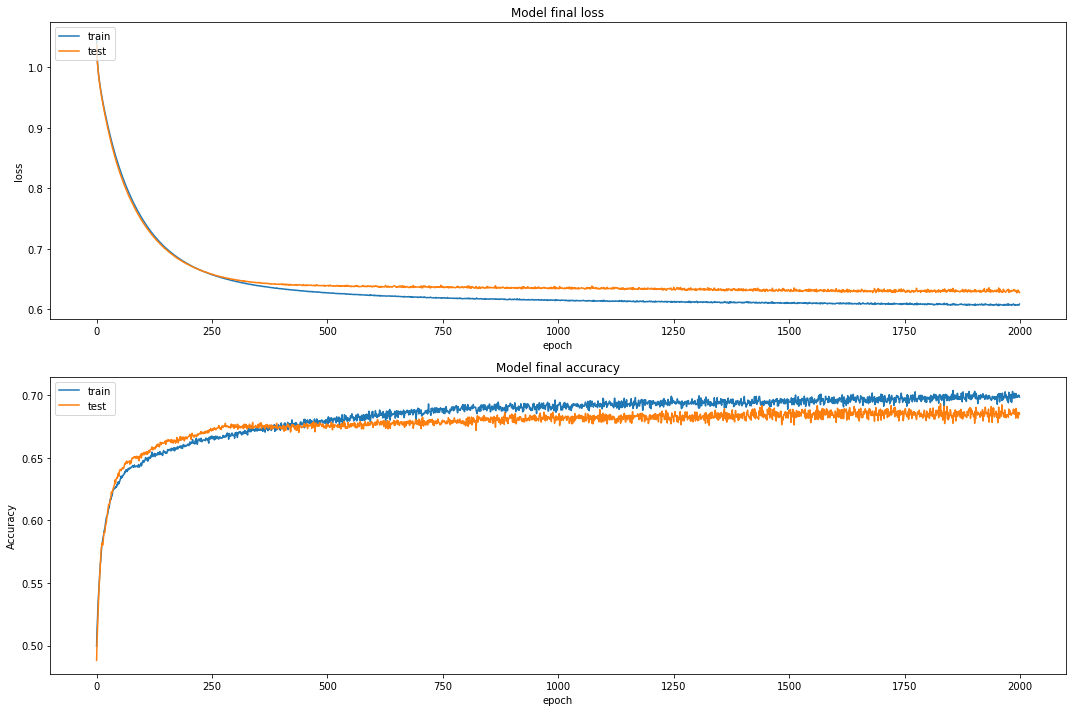

In [50]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(scoresFinal1.history['loss'])
plt.plot(scoresFinal1.history['val_loss'])
plt.title('Model final loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(2,1,2)
plt.plot(scoresFinal1.history['accuracy'])
plt.plot(scoresFinal1.history['val_accuracy'])
plt.title('Model final accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.tight_layout()

In [23]:
#create model with ouliyers
modelFinal1_a = Sequential()
modelFinal1_a.add(Dense(20, input_dim=30, activation='elu'))
modelFinal1_a.add(Dense(20, activation='elu'))
modelFinal1_a.add(Dense(20, activation='elu'))
modelFinal1_a.add(Dense(1, activation='sigmoid'))
# Compile model
sgd = SGD(lr=0.001, momentum=0.9)
modelFinal1_a.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
scoresFinal1_a =modelFinal1_a.fit(X_train_raw, y_train_raw,validation_data=(X_valid_raw,y_valid_raw), 
                            epochs=2000, batch_size=128, verbose = 0)

In [24]:
print(modelFinal1_a.summary())

print('The final validation accuracy was ', scoresFinal1_a.history['val_accuracy'][-1] * 100)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_22 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_23 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 21        
Total params: 1,481
Trainable params: 1,481
Non-trainable params: 0
_________________________________________________________________
None
The final validation accuracy was  63.5454535484314


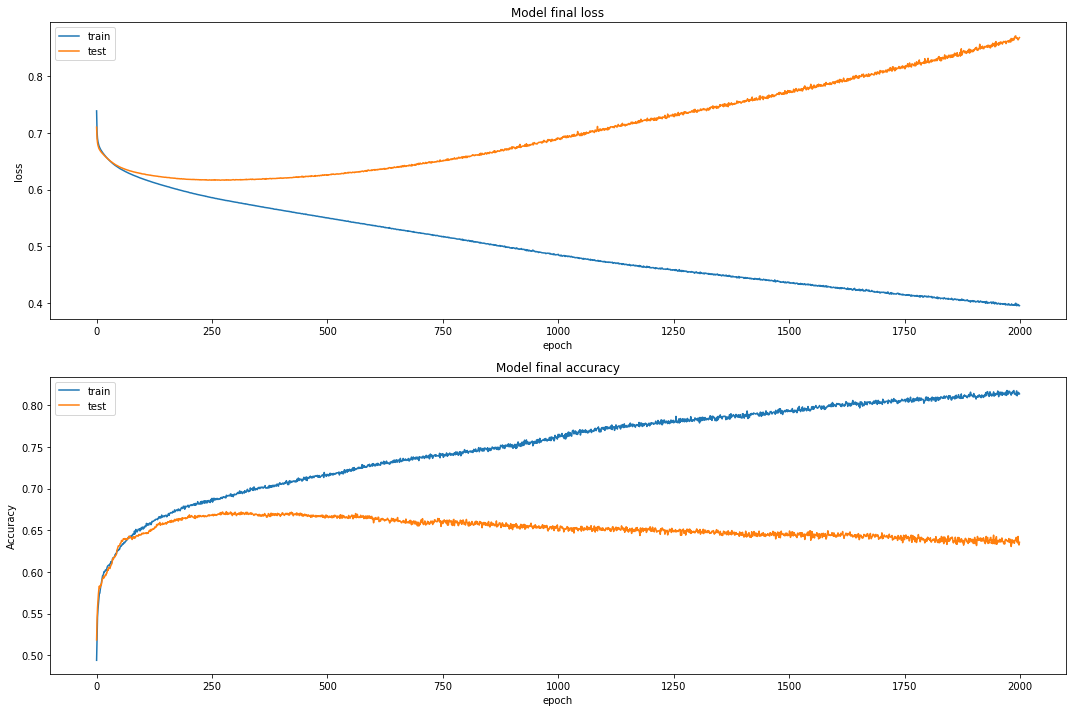

In [25]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(scoresFinal1_a.history['loss'])
plt.plot(scoresFinal1_a.history['val_loss'])
plt.title('Model final loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(2,1,2)
plt.plot(scoresFinal1_a.history['accuracy'])
plt.plot(scoresFinal1_a.history['val_accuracy'])
plt.title('Model final accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.tight_layout()

In [26]:
#create model with ouliyers
modelFinal1_b = Sequential()
modelFinal1_b.add(Dense(20, input_dim=30, activation='elu'))
modelFinal1_b.add(Dropout(0.2))
modelFinal1_b.add(Dense(20, activation='elu'))
modelFinal1_b.add(Dropout(0.2))
modelFinal1_b.add(Dense(20, activation='elu'))
modelFinal1_b.add(Dropout(0.2))
modelFinal1_b.add(Dense(1, activation='sigmoid'))
# Compile model
sgd = SGD(lr=0.001, momentum=0.9)
modelFinal1_b.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
scoresFinal1_b =modelFinal1_b.fit(X_train_raw, y_train_raw,validation_data=(X_valid_raw,y_valid_raw), 
                            epochs=2000, batch_size=128, verbose = 0)

In [27]:
print(modelFinal1_b.summary())

print('The final validation accuracy was ', scoresFinal1_b.history['val_accuracy'][-1] * 100)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 20)                620       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 20)                420       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 20)                420       
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 1)                

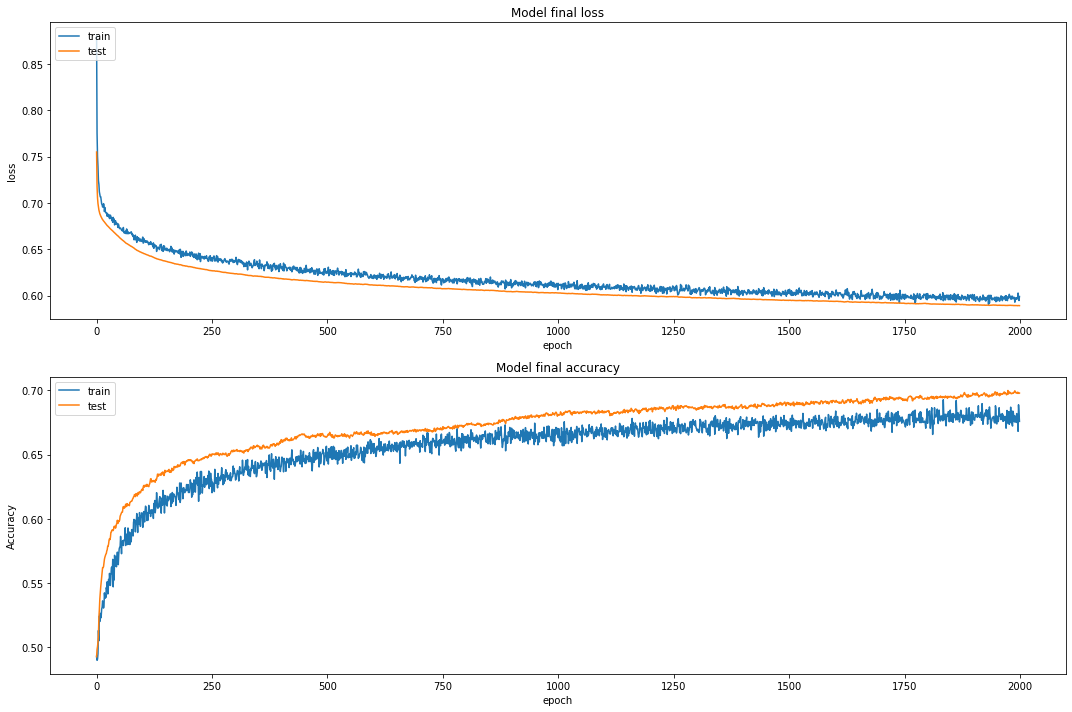

In [28]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(scoresFinal1_b.history['loss'])
plt.plot(scoresFinal1_b.history['val_loss'])
plt.title('Model final loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(2,1,2)
plt.plot(scoresFinal1_b.history['accuracy'])
plt.plot(scoresFinal1_b.history['val_accuracy'])
plt.title('Model final accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.tight_layout()

In [32]:
#create model with pca and without ouliyers
modelFinal2 = Sequential()
modelFinal2.add(Dense(20, input_dim=26, activation='elu'))
modelFinal2.add(Dropout(0.2))
modelFinal2.add(Dense(20, activation='elu'))
modelFinal2.add(Dropout(0.2))
modelFinal2.add(Dense(20, activation='elu'))
modelFinal2.add(Dropout(0.2))
modelFinal2.add(Dense(1, activation='sigmoid'))
# Compile model
sgd = SGD(lr=0.001, momentum=0.9)
modelFinal2.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
scoresFinal2 =modelFinal2.fit(X_pca_train_final, y_train,validation_data=(X_pca_valid_final,y_valid), 
                            epochs=2000, batch_size=128, verbose = 0)


In [33]:
print(modelFinal2.summary())
print('The final validation accuracy was ', scoresFinal2.history['val_accuracy'][-1] * 100)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 20)                540       
_________________________________________________________________
dropout_7 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 20)                420       
_________________________________________________________________
dropout_8 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 20)                420       
_________________________________________________________________
dropout_9 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 1)                

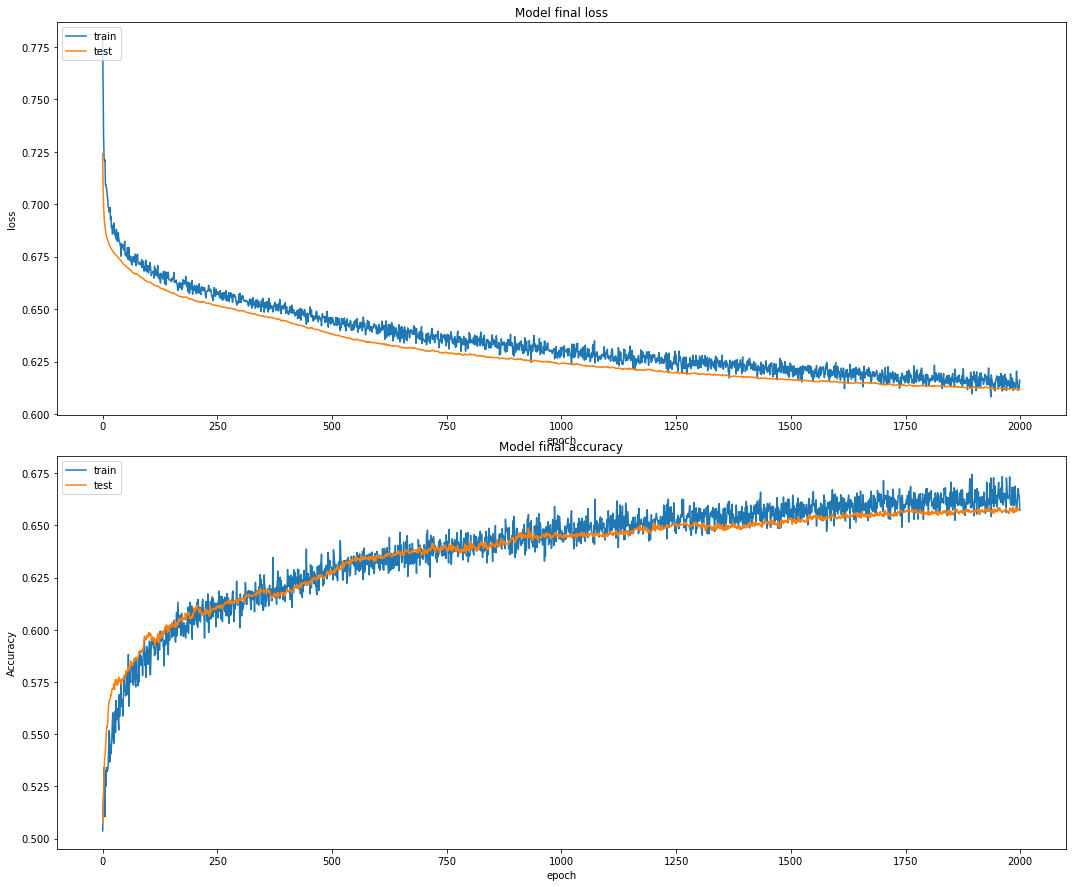

In [34]:
plt.figure(figsize=(15,12))

plt.subplot(2,1,1)
plt.plot(scoresFinal2.history['loss'])
plt.plot(scoresFinal2.history['val_loss'])
plt.title('Model final loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()

plt.subplot(2,1,2)
plt.plot(scoresFinal2.history['accuracy'])
plt.plot(scoresFinal2.history['val_accuracy'])
plt.title('Model final accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

## Train Choosen Model with More Epochs Yet (5000 Epochs).

In [40]:
#create model with ouliyers
modelFinalFinal = Sequential()
modelFinalFinal.add(Dense(20, input_dim=30, activation='elu'))
modelFinalFinal.add(Dropout(0.2))
modelFinalFinal.add(Dense(20, activation='elu'))
modelFinalFinal.add(Dropout(0.2))
modelFinalFinal.add(Dense(20, activation='elu'))
modelFinalFinal.add(Dropout(0.2))
modelFinalFinal.add(Dense(1, activation='sigmoid'))
# Compile model
sgd = SGD(lr=0.001, momentum=0.9)
modelFinalFinal.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
scoresmodelFinalFinal =modelFinalFinal.fit(X_train_raw, y_train_raw,validation_data=(X_valid_raw,y_valid_raw), 
                            epochs=5000, batch_size=128, verbose = 0)

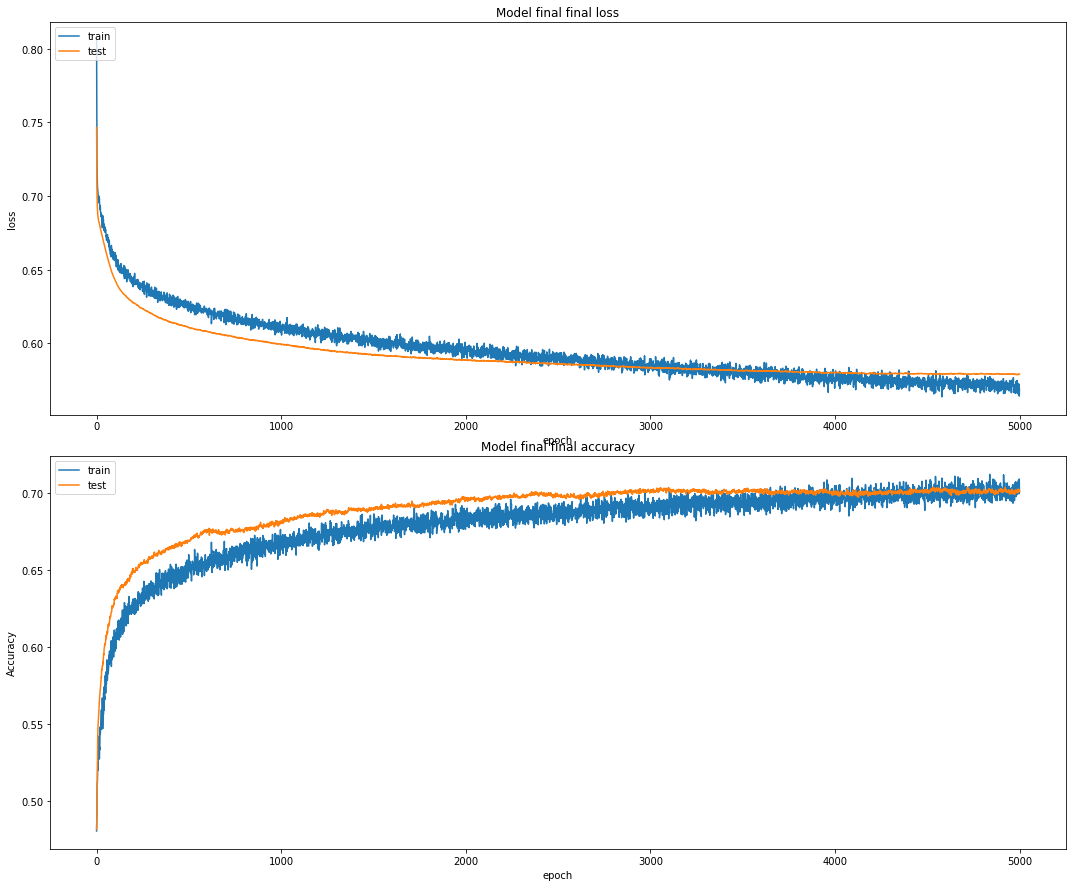

In [41]:
plt.figure(figsize=(15,12))

plt.subplot(2,1,1)
plt.plot(scoresmodelFinalFinal.history['loss'])
plt.plot(scoresmodelFinalFinal.history['val_loss'])
plt.title('Model final final loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()

plt.subplot(2,1,2)
plt.plot(scoresmodelFinalFinal.history['accuracy'])
plt.plot(scoresmodelFinalFinal.history['val_accuracy'])
plt.title('Model final final accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [42]:
print(modelFinalFinal.summary())
print('The final validation accuracy was ', scoresmodelFinalFinal.history['val_accuracy'][-1] * 100)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 20)                620       
_________________________________________________________________
dropout_13 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 20)                420       
_________________________________________________________________
dropout_14 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 20)                420       
_________________________________________________________________
dropout_15 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 1)               

## Predicting New Values of Test Set

In [46]:
# make a prediction
y_predicted = modelFinalFinal.predict_classes(df_x_test_stand)

In [47]:
#save the predicted values as txt file
y_predicted = y_predicted.astype(int)
np.savetxt('./data/ytest_predicted.txt', y_predicted, delimiter=',') 

## Explaining ELU actvation Function

## Conclusions

In conclusion, I made a final model of a neural network composed of three dense layers of 20 units.

In the first instance I did not use the regularization method because before many attempts I discovered that using regularization is worse than not using it in some cases. However, as can be seen in the previous prototypical final models without regularization, the accuracy of the training and the validation diverge between them before 100 times. Therefore, the model clearly shows the effects of overfitting, but I do not make the first attempt with regularization because at the decision regularization stage I realize that if the use of regularization, the accuracy in the validation set shows the worst result than the model without regularization.

On the other, I noticed that the L2 regularization technique, which had shown better outcomes, has a problem that reduces from overfitting by decreasing the training accuracy. So, I decided to provide the second better regularization technique called **dropout**. I this case the model shows decrease significantly without losing accuracy.

In the case to use PCA or not to reduce the dimensionality of the dataset, I found that I obtained a 4% less accuracy against not used that. This decreasing on accuracy could be significant if the test data has outliers because I can´t guess that the new data won't have outliers and PCA is sensible to outliers
Finnally I decided to increase considerably the number of epochs until I see not changes in the loss and acuraccy on both validation and traning set.

In summary, I follow the next strategy:

![img2](./Strategy_Decision_Tree.jpg)
